In [1]:
# Standard deep q network

from dqn import DQN

dqn = DQN(dueling=False)
dqn.learning()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

csv/dqn.csv created with 2 columns.


2024-11-14 13:57:50.041926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-14 13:57:50.042054: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-11-14 13:57:50.210297: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-11-14 13:57:50.244632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-14 13:57:54.797740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Iteration 1000 reward: 0.638


/Users/dunghoangtrung125/workspace/personal/graduation_thesis/drl_sample/util/csv_util.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_row], ignore_index=True)


Iteration 2000 reward: 0.6685
Iteration 3000 reward: 0.7186666666666667
Iteration 4000 reward: 0.7595
Iteration 5000 reward: 0.8008
Iteration 6000 reward: 0.8288333333333333
Iteration 7000 reward: 0.8668571428571429
Iteration 8000 reward: 0.888125
Iteration 9000 reward: 0.9183333333333333
Iteration 10000 reward: 0.9438
Iteration 11000 reward: 0.9667272727272728
Iteration 12000 reward: 0.98875
Iteration 13000 reward: 1.0087692307692309
Iteration 14000 reward: 1.0262857142857142
Iteration 15000 reward: 1.0454
Iteration 16000 reward: 1.06225
Iteration 17000 reward: 1.0814705882352942
Iteration 18000 reward: 1.0977777777777777
Iteration 19000 reward: 1.112421052631579
Iteration 20000 reward: 1.12245
Iteration 21000 reward: 1.1315714285714287
Iteration 22000 reward: 1.141318181818182
Iteration 23000 reward: 1.1514782608695653
Iteration 24000 reward: 1.1590416666666667
Iteration 25000 reward: 1.16848
Iteration 26000 reward: 1.1772307692307693
Iteration 27000 reward: 1.1856296296296296
Iterat

In [1]:
# Traning ddqn network
from dqn import DQN

ddqn = DQN(dueling=True)
ddqn.learning()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-11-12 18:03:27.345949: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-12 18:03:27.346062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-11-12 18:03:27.627488: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-11-12 18:03:27.675916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-12 18:03:35.695369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Iteration 1000 reward: 0.659
Iteration 2000 reward: 0.693
Iteration 3000 reward: 0.718
Iteration 4000 reward: 0.76075
Iteration 5000 reward: 0.7976
Iteration 6000 reward: 0.8361666666666666
Iteration 7000 reward: 0.8681428571428571
Iteration 8000 reward: 0.894625
Iteration 9000 reward: 0.9218888888888889
Iteration 10000 reward: 0.9492
Iteration 11000 reward: 0.9782727272727273
Iteration 12000 reward: 0.9995833333333334
Iteration 13000 reward: 1.015923076923077
Iteration 14000 reward: 1.0347857142857142
Iteration 15000 reward: 1.0494
Iteration 16000 reward: 1.0620625
Iteration 17000 reward: 1.077764705882353
Iteration 18000 reward: 1.0922222222222222
Iteration 19000 reward: 1.1056842105263158
Iteration 20000 reward: 1.1199
Iteration 21000 reward: 1.1312857142857142
Iteration 22000 reward: 1.144590909090909
Iteration 23000 reward: 1.154782608695652
Iteration 24000 reward: 1.163375
Iteration 25000 reward: 1.17252
Iteration 26000 reward: 1.1822692307692308
Iteration 27000 reward: 1.1890740

In [2]:
# Traning ddqn network with jam me if you can param
from dqn import DQN

ddqn = DQN(dueling=True)
ddqn.learning()

2024-11-13 16:28:07.549423: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-11-13 16:28:08.949155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Iteration 1000 reward: 0.651
Iteration 2000 reward: 0.6995
Iteration 3000 reward: 0.7293333333333333
Iteration 4000 reward: 0.76675
Iteration 5000 reward: 0.7988
Iteration 6000 reward: 0.8355
Iteration 7000 reward: 0.8645714285714285
Iteration 8000 reward: 0.892125
Iteration 9000 reward: 0.9157777777777778
Iteration 10000 reward: 0.9491
Iteration 11000 reward: 0.9748181818181818
Iteration 12000 reward: 0.99725
Iteration 13000 reward: 1.0142307692307693
Iteration 14000 reward: 1.0292142857142856
Iteration 15000 reward: 1.0482666666666667
Iteration 16000 reward: 1.0659375
Iteration 17000 reward: 1.0812941176470587
Iteration 18000 reward: 1.0966111111111112
Iteration 19000 reward: 1.110157894736842
Iteration 20000 reward: 1.12265
Iteration 21000 reward: 1.1336666666666666
Iteration 22000 reward: 1.146
Iteration 23000 reward: 1.1553478260869565
Iteration 24000 reward: 1.1670833333333333
Iteration 25000 reward: 1.17484
Iteration 26000 reward: 1.184
Iteration 27000 reward: 1.1921111111111111

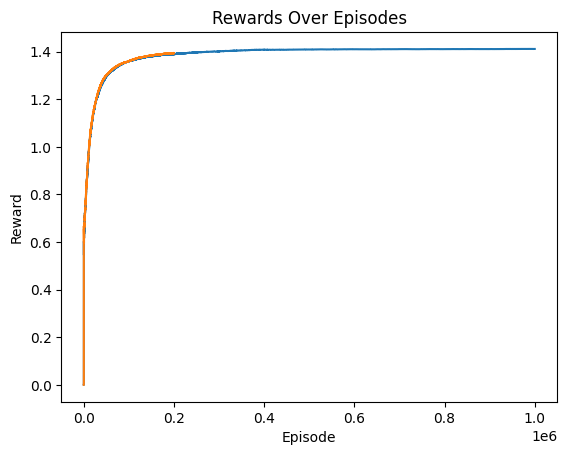

In [12]:
import numpy as np
import matplotlib.pyplot as plt

dqn_rewards = np.load('model/dqn.npy')
ddqn_rewards = np.load('model/ddqn.npy')

plt.plot(dqn_rewards)
plt.plot(ddqn_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Over Episodes')
plt.show()

In [2]:
import tensorflow as tf

new_model = tf.keras.models.load_model('model/ddqn.keras')
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 512)          2048        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 256)          131328      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           16448       dense_1[0][0]                    
______________________________________________________________________________________________

In [1]:
import numpy as np

from q_learning_agent import QLearningAgent
q_learning_agent = QLearningAgent()
q_learning_agent.learning()
np.save('model/q_learning_rewards.npy', q_learning_agent.rewards)


Iteration 1000 reward: 0.466
Iteration 2000 reward: 0.472
Iteration 3000 reward: 0.4856666666666667
Iteration 4000 reward: 0.49025
Iteration 5000 reward: 0.4954
Iteration 6000 reward: 0.5133333333333333
Iteration 7000 reward: 0.522
Iteration 8000 reward: 0.5275
Iteration 9000 reward: 0.5315555555555556
Iteration 10000 reward: 0.5366
Iteration 11000 reward: 0.5467272727272727
Iteration 12000 reward: 0.552
Iteration 13000 reward: 0.5583846153846154
Iteration 14000 reward: 0.5658571428571428
Iteration 15000 reward: 0.5745333333333333
Iteration 16000 reward: 0.5795
Iteration 17000 reward: 0.5824117647058824
Iteration 18000 reward: 0.5863888888888888
Iteration 19000 reward: 0.5923157894736842
Iteration 20000 reward: 0.59935
Iteration 21000 reward: 0.6055238095238096
Iteration 22000 reward: 0.6092727272727273
Iteration 23000 reward: 0.616
Iteration 24000 reward: 0.6182083333333334
Iteration 25000 reward: 0.62276
Iteration 26000 reward: 0.6277692307692307
Iteration 27000 reward: 0.63162962962

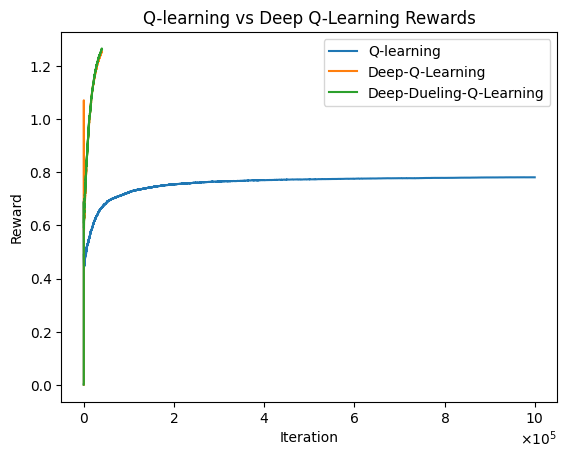

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

q_learning_rewards = np.load('model/q_learning_rewards.npy')
dqn_rewards = np.load('model/dqn.npy')
ddqn_rewards = np.load('model/ddqn.npy')

plt.plot(q_learning_rewards, label='Q-learning')
plt.plot(dqn_rewards, label='Deep-Q-Learning')
plt.plot(ddqn_rewards, label='Deep-Dueling-Q-Learning')
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Q-learning vs Deep Q-Learning Rewards')
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='x', scilimits=(5, 5))  # Set x-axis labels in millions
plt.legend()
plt.show()